In [45]:
import numpy as np
import sklearn
import sklearn.datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [20]:
X, y = sklearn.datasets.load_digits(return_X_y=True)

In [7]:
scores = cross_val_score(dt, X, y, cv=5, n_jobs=-1, verbose=1)
scores.mean(), scores.std()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished


(0.7330963963724318, 0.043913294678501635)

In [8]:
def calc_reconstruct_error(X, X_restored):
    return np.linalg.norm(X - X_restored, ord=2)

In [18]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
scores = []
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores = np.array(scores)
scores.mean(), scores.std()

(0.7707149489322191, 0.03374332121073383)

In [55]:
n_comp = [3, 5, 10, 15, 20, 32, 40, 48, 56, 64]
means = []
stds = []

In [56]:
def trunc_svd(A, n_comp, n_iter=10, random_state=42):
    np.random.seed(random_state)
    Q = np.random.normal(size=(len(A), n_comp))

    for i in range(n_iter):
        Q, r = np.linalg.qr(A.T @ Q)
        Q, r = np.linalg.qr(A @ Q)

    u, s, v = np.linalg.svd((Q.T @ A), full_matrices=False)
    return Q @ u @ np.diag(s), v.T

In [57]:
for n in n_comp:
    scores = []
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        _, tf_op = trunc_svd(X_train, n)
        X_train = X_train @ tf_op
        X_test = X_test @ tf_op
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    scores = np.array(scores)
    means.append(scores.mean())
    stds.append(scores.std())

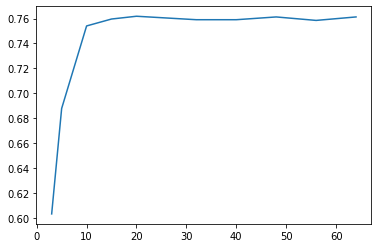

In [58]:
plt.plot(n_comp, means);